In [1]:
import sys
sys.path.append("../")

In [2]:
from product.barrier_option import BarrierOption
from product.product_utils import *
from single_barrier_pricer import single_barrier_pricer, single_barrier_calc_vec

In [3]:
import pandas as pd

In [4]:
result_dict = {}
barrier = BarrierOption(strike=100, option_type=OptionType.Call, barrier=130, direction=BarrierDirectionEnum.Up,
                            barrier_type=BarrierTypeEnum.Out, observation_type=ObservationTypeEnum.Continuous)
for spot in range(80*20, 161*20, 1):
    result = single_barrier_calc_vec(single_barrier_pricer, barrier, spot=spot / 20., r=0.01, vol=0.3,
                                         tau=0., q=0., day_count=DayCountConvention.ACT365)
    result_dict[spot] = result

In [5]:
result_frame = pd.DataFrame.from_dict(result_dict).T

In [6]:
result_frame.columns = ["PV", "Delta", "Gamma", "Vega"]

In [7]:
result_frame.index = [x / 20. for x in result_frame.index]

<AxesSubplot:>

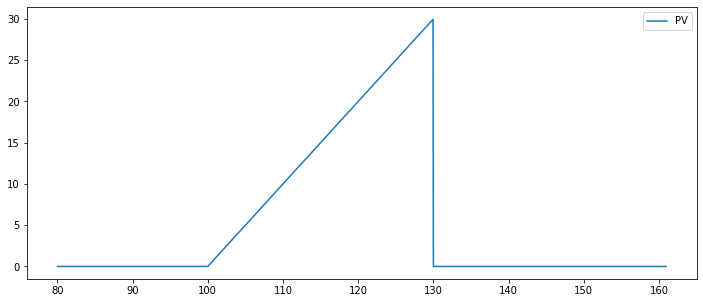

In [8]:
result_frame[['PV']].plot(figsize=(12,5))